In [1]:
#importing Libraries :)

import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dense, Dropout, Flatten,Input, BatchNormalization
from keras import regularizers
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import History 
history = History()

import matplotlib.pyplot as plt
from keras.layers import Dense,Activation,Layer,Lambda

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
#load dataset

dataset=pd.read_csv("breastcancerdataset.csv")

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#Don't need id column and Unnamed:32 column
dataset=dataset.drop(["id","Unnamed: 32"],axis=1)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
dataset.shape

(569, 31)

In [6]:
#check for null values
pd.isnull(dataset).sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
y = dataset.iloc[:,0].values
x = dataset.drop(["diagnosis"],axis=1)
#y = dataset.iloc[:,0].values

In [8]:
x.to_numpy()

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [9]:
x.shape

(569, 30)

In [10]:
print(y)
#encoding Categorical Data Turning 'y' values into numeric value
from sklearn.preprocessing import LabelEncoder
labelencoder_x= LabelEncoder()
y = labelencoder_x.fit_transform(y)
print(y)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

In [11]:
#spliting the dataset into train and test set

x_train,x_val,y_train,y_val= train_test_split(x,y,test_size = 0.1, random_state = 0)
x_train,x_test,y_train,y_test= train_test_split(x_train,y_train,test_size = 0.1, random_state = 0)

In [12]:
#Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.fit_transform(x_test)

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.fit_transform(x_test)
x_val = min_max_scaler.fit_transform(x_val)

In [14]:
input_data = Input(shape=(30,))
encoded = Dense(25, activation='relu')(input_data)
encoded = Dense(20, activation='relu')(encoded)
#encoded = BatchNormalization()(encoded)
encoded = Dense(10, activation='relu')(encoded)
#encoded = BatchNormalization()(encoded)

encoded = Dense(3, activation='relu')(encoded)
#encoded = BatchNormalization()(encoded)

decoded = Dense(10, activation='relu')(encoded)
decoded = Dense(20, activation='relu')(decoded)
#decoded = BatchNormalization()(decoded)
decoded = Dense(25, activation='relu')(decoded)
decoded = Dense(30, activation='sigmoid')(decoded)

In [15]:
autoencoder = Model(input_data, decoded)
opt = keras.optimizers.Adam(lr=0.01)
autoencoder.compile(loss="mse",optimizer='Adam')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                775       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 33        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_6 (Dense)              (None, 20)                220 

In [16]:
x_test

array([[0.60581042, 0.65805658, 0.61222417, ..., 0.71293748, 1.        ,
        0.53274776],
       [0.41150909, 0.84870849, 0.40596436, ..., 0.52261109, 0.4717482 ,
        0.39278213],
       [0.15047489, 0.66482165, 0.1459699 , ..., 0.1482501 , 0.24497535,
        0.46992553],
       ...,
       [0.32273884, 0.59225092, 0.30865109, ..., 0.29221392, 0.1774744 ,
        0.19763223],
       [0.5462164 , 0.43050431, 0.55221125, ..., 0.71175777, 0.59385666,
        0.88543059],
       [0.68713142, 0.32349323, 0.70547503, ..., 0.82658278, 0.57830868,
        1.        ]])

In [17]:
history = autoencoder.fit(x_train, x_train, epochs=500, shuffle=True, validation_data=(x_val, x_val))

Train on 460 samples, validate on 57 samples
Epoch 1/500
460/460 [==============================] - 0s 533us/step - loss: 0.0979 - val_loss: 0.0827
Epoch 2/500
460/460 [==============================] - 0s 65us/step - loss: 0.0926 - val_loss: 0.0779
Epoch 3/500
460/460 [==============================] - 0s 61us/step - loss: 0.0813 - val_loss: 0.0691
Epoch 4/500
460/460 [==============================] - 0s 63us/step - loss: 0.0583 - val_loss: 0.0729
Epoch 5/500
460/460 [==============================] - 0s 63us/step - loss: 0.0386 - val_loss: 0.0919
Epoch 6/500
460/460 [==============================] - 0s 61us/step - loss: 0.0319 - val_loss: 0.0830
Epoch 7/500
460/460 [==============================] - 0s 67us/step - loss: 0.0288 - val_loss: 0.0784
Epoch 8/500
460/460 [==============================] - 0s 76us/step - loss: 0.0269 - val_loss: 0.0770
Epoch 9/500
460/460 [==============================] - 0s 72us/step - loss: 0.0255 - val_loss: 0.0735
Epoch 10/500
460/460 [==============

460/460 [==============================] - 0s 61us/step - loss: 0.0062 - val_loss: 0.0213
Epoch 81/500
460/460 [==============================] - 0s 59us/step - loss: 0.0062 - val_loss: 0.0215
Epoch 82/500
460/460 [==============================] - 0s 56us/step - loss: 0.0062 - val_loss: 0.0213
Epoch 83/500
460/460 [==============================] - 0s 61us/step - loss: 0.0062 - val_loss: 0.0212
Epoch 84/500
460/460 [==============================] - 0s 59us/step - loss: 0.0062 - val_loss: 0.0214
Epoch 85/500
460/460 [==============================] - 0s 59us/step - loss: 0.0062 - val_loss: 0.0213
Epoch 86/500
460/460 [==============================] - 0s 56us/step - loss: 0.0062 - val_loss: 0.0212
Epoch 87/500
460/460 [==============================] - 0s 59us/step - loss: 0.0062 - val_loss: 0.0212
Epoch 88/500
460/460 [==============================] - 0s 59us/step - loss: 0.0061 - val_loss: 0.0211
Epoch 89/500
460/460 [==============================] - 0s 54us/step - loss: 0.0061 - 

460/460 [==============================] - 0s 59us/step - loss: 0.0059 - val_loss: 0.0207
Epoch 160/500
460/460 [==============================] - 0s 59us/step - loss: 0.0059 - val_loss: 0.0206
Epoch 161/500
460/460 [==============================] - 0s 59us/step - loss: 0.0059 - val_loss: 0.0204
Epoch 162/500
460/460 [==============================] - 0s 59us/step - loss: 0.0059 - val_loss: 0.0205
Epoch 163/500
460/460 [==============================] - 0s 56us/step - loss: 0.0059 - val_loss: 0.0203
Epoch 164/500
460/460 [==============================] - 0s 59us/step - loss: 0.0059 - val_loss: 0.0205
Epoch 165/500
460/460 [==============================] - 0s 56us/step - loss: 0.0059 - val_loss: 0.0204
Epoch 166/500
460/460 [==============================] - 0s 56us/step - loss: 0.0058 - val_loss: 0.0206
Epoch 167/500
460/460 [==============================] - 0s 63us/step - loss: 0.0059 - val_loss: 0.0206
Epoch 168/500
460/460 [==============================] - 0s 65us/step - loss: 

Epoch 238/500
460/460 [==============================] - 0s 65us/step - loss: 0.0057 - val_loss: 0.0203
Epoch 239/500
460/460 [==============================] - 0s 56us/step - loss: 0.0057 - val_loss: 0.0203
Epoch 240/500
460/460 [==============================] - 0s 61us/step - loss: 0.0057 - val_loss: 0.0202
Epoch 241/500
460/460 [==============================] - 0s 56us/step - loss: 0.0057 - val_loss: 0.0204
Epoch 242/500
460/460 [==============================] - 0s 52us/step - loss: 0.0057 - val_loss: 0.0201
Epoch 243/500
460/460 [==============================] - 0s 56us/step - loss: 0.0057 - val_loss: 0.0202
Epoch 244/500
460/460 [==============================] - 0s 59us/step - loss: 0.0057 - val_loss: 0.0202
Epoch 245/500
460/460 [==============================] - 0s 56us/step - loss: 0.0057 - val_loss: 0.0201
Epoch 246/500
460/460 [==============================] - 0s 56us/step - loss: 0.0057 - val_loss: 0.0202
Epoch 247/500
460/460 [==============================] - 0s 56us

Epoch 317/500
460/460 [==============================] - 0s 56us/step - loss: 0.0056 - val_loss: 0.0203
Epoch 318/500
460/460 [==============================] - 0s 106us/step - loss: 0.0056 - val_loss: 0.0203
Epoch 319/500
460/460 [==============================] - 0s 85us/step - loss: 0.0056 - val_loss: 0.0204
Epoch 320/500
460/460 [==============================] - 0s 67us/step - loss: 0.0056 - val_loss: 0.0203
Epoch 321/500
460/460 [==============================] - 0s 65us/step - loss: 0.0055 - val_loss: 0.0203
Epoch 322/500
460/460 [==============================] - 0s 82us/step - loss: 0.0056 - val_loss: 0.0203
Epoch 323/500
460/460 [==============================] - 0s 63us/step - loss: 0.0056 - val_loss: 0.0200
Epoch 324/500
460/460 [==============================] - 0s 52us/step - loss: 0.0056 - val_loss: 0.0203
Epoch 325/500
460/460 [==============================] - 0s 61us/step - loss: 0.0056 - val_loss: 0.0205
Epoch 326/500
460/460 [==============================] - 0s 59u

Epoch 396/500
460/460 [==============================] - 0s 52us/step - loss: 0.0055 - val_loss: 0.0209
Epoch 397/500
460/460 [==============================] - 0s 50us/step - loss: 0.0054 - val_loss: 0.0207
Epoch 398/500
460/460 [==============================] - 0s 56us/step - loss: 0.0054 - val_loss: 0.0206
Epoch 399/500
460/460 [==============================] - 0s 50us/step - loss: 0.0054 - val_loss: 0.0205
Epoch 400/500
460/460 [==============================] - 0s 52us/step - loss: 0.0054 - val_loss: 0.0208
Epoch 401/500
460/460 [==============================] - 0s 52us/step - loss: 0.0054 - val_loss: 0.0204
Epoch 402/500
460/460 [==============================] - 0s 52us/step - loss: 0.0054 - val_loss: 0.0207
Epoch 403/500
460/460 [==============================] - 0s 48us/step - loss: 0.0055 - val_loss: 0.0206
Epoch 404/500
460/460 [==============================] - 0s 56us/step - loss: 0.0054 - val_loss: 0.0207
Epoch 405/500
460/460 [==============================] - 0s 56us

Epoch 475/500
460/460 [==============================] - 0s 50us/step - loss: 0.0054 - val_loss: 0.0208
Epoch 476/500
460/460 [==============================] - 0s 48us/step - loss: 0.0053 - val_loss: 0.0210
Epoch 477/500
460/460 [==============================] - 0s 50us/step - loss: 0.0053 - val_loss: 0.0208
Epoch 478/500
460/460 [==============================] - 0s 50us/step - loss: 0.0053 - val_loss: 0.0211
Epoch 479/500
460/460 [==============================] - 0s 48us/step - loss: 0.0053 - val_loss: 0.0208
Epoch 480/500
460/460 [==============================] - 0s 50us/step - loss: 0.0053 - val_loss: 0.0208
Epoch 481/500
460/460 [==============================] - 0s 50us/step - loss: 0.0053 - val_loss: 0.0207
Epoch 482/500
460/460 [==============================] - 0s 50us/step - loss: 0.0053 - val_loss: 0.0207
Epoch 483/500
460/460 [==============================] - 0s 48us/step - loss: 0.0053 - val_loss: 0.0209
Epoch 484/500
460/460 [==============================] - 0s 48us

In [18]:
evaluation = autoencoder.evaluate(x_test, x_test)

print("Loss:",evaluation)

52/52 [==============================] - 0s 96us/step
Loss: 0.025884163064452317


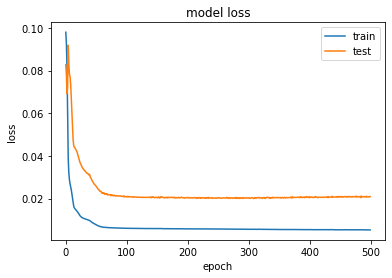

In [29]:
# Plot training loss and validation split loss over the epochs
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('DenseAE_model_loss.png')
plt.show()

In [20]:
autoencoder.evaluate(x_test, x_test)
#model.save('si_autoencoder.model')
data = autoencoder.predict(x_test)

52/52 [==============================] - 0s 58us/step


In [21]:
encoder = Model(input_data, encoded)
latent_vector_train = encoder.predict(x_train)
latent_vector = encoder.predict(x_test)

In [22]:
latent_vector.shape

(52, 3)

In [23]:
latent_vector

array([[0.        , 0.71316695, 0.33806193],
       [0.        , 1.7795997 , 1.0829673 ],
       [0.        , 4.76766   , 1.223442  ],
       [0.        , 1.9199283 , 0.9813514 ],
       [0.        , 2.4084063 , 1.6562381 ],
       [0.        , 1.8224819 , 1.3872007 ],
       [0.        , 3.6954045 , 1.4506118 ],
       [0.        , 2.572092  , 1.1742795 ],
       [0.        , 2.6265657 , 1.2954676 ],
       [0.        , 2.6518826 , 1.1464902 ],
       [0.        , 2.227137  , 1.266209  ],
       [0.        , 2.2260647 , 1.5798957 ],
       [0.        , 2.5700889 , 1.6717293 ],
       [0.        , 2.4382792 , 1.1957763 ],
       [0.        , 1.1953381 , 0.9600218 ],
       [0.        , 2.1344543 , 1.1431135 ],
       [0.        , 3.625218  , 1.6888286 ],
       [0.        , 0.3558782 , 0.32821572],
       [0.        , 3.1578581 , 1.6723437 ],
       [0.        , 2.579391  , 1.9333117 ],
       [0.        , 0.53071445, 0.5264409 ],
       [0.        , 1.4992347 , 0.449689  ],
       [0.

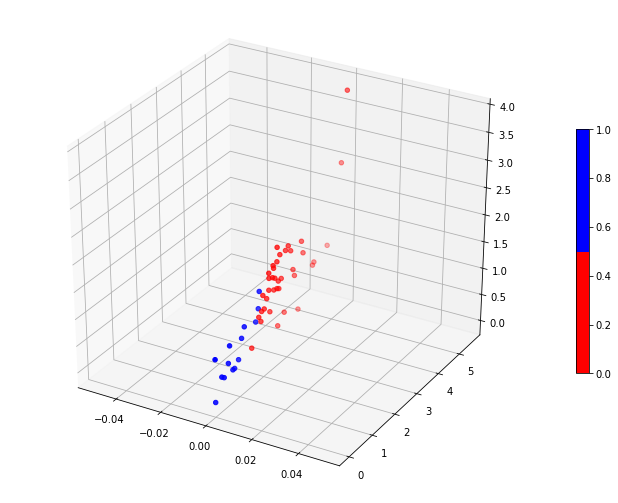

In [28]:
import matplotlib
%matplotlib inline
from mpl_toolkits import mplot3d
colors=['red','blue']
plt.figure(figsize =(12, 9))
ax = plt.axes(projection='3d')
surf = ax.scatter3D(latent_vector[:, 0], latent_vector[:, 1], latent_vector[:, 2], c=y_test, cmap=matplotlib.colors.ListedColormap(colors))
# Add a color bar which maps values to colors.
cb = plt.colorbar(surf, shrink=0.5, aspect=20)
plt.savefig('DenseAE_3d.png')
plt.show()

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knnscores = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(latent_vector_train, y_train)
    k = knn.score(latent_vector,y_test)
    knnscores.append(k)

s = np.array(knnscores)
result = np.where(s == s.max())
print('Knn Score : ',s.max(),'and k : ', result[0])

Knn Score :  0.8846153846153846 and k :  [1]


In [26]:
y_pred=knn.predict(latent_vector)

In [30]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(latent_vector)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Mean Absolute Error: 0.21153846153846154
Mean Squared Error: 0.21153846153846154
Root Mean Squared Error: 0.45993310550389993
[[27 11]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        38
           1       0.56      1.00      0.72        14

    accuracy                           0.79        52
   macro avg       0.78      0.86      0.77        52
weighted avg       0.88      0.79      0.80        52

